# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


## Dataset Exploration
----
Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [164]:
# Test importing all required packages
import tensorflow as tf
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import cv2
import os
import pickle
from tqdm import tqdm
import math
import time

print('Modules loaded successfully.')

Modules loaded successfully.


In [165]:

# TODO: fill this in based on where you saved the training and testing data
training_file = 'lab-2-data/train.p'
testing_file = 'lab-2-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']



In [166]:
num_img = len(X_train)
num_height = len(X_train[0])
num_width = len(X_train[0,0])
num_colors = len(X_train[0,0,0])

print('Images: ' + str(num_img) + '\n' + \
      'Height: ' + str(num_height) + '\n' + \
      'Width: ' + str(num_width) + '\n' + \
      'Colors: ' + str(num_colors) + '\n')

Images: 39209
Height: 32
Width: 32
Colors: 3



In [167]:
# TODO: what's the shape of an image?
num_img = len(X_test)
num_height = len(X_test[0])
num_width = len(X_test[0][0])
num_colors = len(X_test[0][0][0])

print('Images: ' + str(num_img) + '\n' + \
      'Height: ' + str(num_height) + '\n' + \
      'Width: ' + str(num_width) + '\n' + \
      'Colors: ' + str(num_colors) + '\n')

Images: 12630
Height: 32
Width: 32
Colors: 3



In [168]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: how many classes are in the dataset
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
#print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Number of classes = 43


[75 78 80]


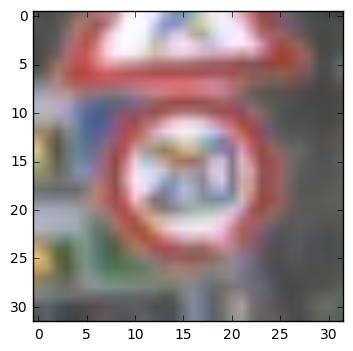

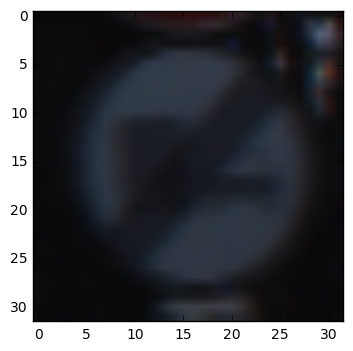

In [169]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#print(X_train[0])



print(X_train[0,0,0,:])


# Show first and last image in database.
plt.imshow(X_train[0])
plt.show()

plt.imshow(X_train[39208])
plt.show()

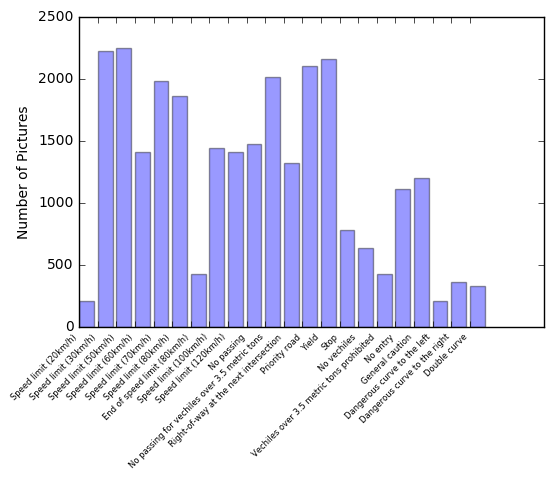

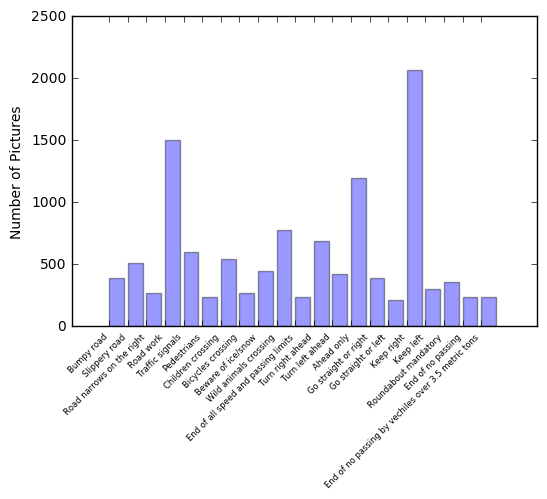

In [170]:
# Print number of each class

#print( y_train )

#print( len(np.bincount(y_train)) )

#print( np.bincount(y_train) )


signnameslist = []
with open('signnames.csv') as csvfile:
    signnames = csv.DictReader(csvfile)
    for row in signnames:
        signnameslist.append(row['SignName'])
        
#print(signnameslist)
        
y_pos = np.arange(len(signnameslist))
number_sign = np.bincount(y_train)


barhstart = 0
barhend = 22
plt.bar(y_pos[barhstart:barhend],number_sign[barhstart:barhend], alpha=0.4)
plt.xticks(y_pos[barhstart:barhend], signnameslist[barhstart:barhend], rotation=45, horizontalalignment='right',size=6)
plt.ylabel('Number of Pictures')


#plt.tight_layout()
plt.show()

barhstart = 22
barhend = 43
plt.bar(y_pos[barhstart:barhend],number_sign[barhstart:barhend], alpha=0.4)
plt.xticks(y_pos[barhstart:barhend], signnameslist[barhstart:barhend], rotation=45, horizontalalignment='right',size=6)
plt.ylabel('Number of Pictures')


#plt.tight_layout()
plt.show()



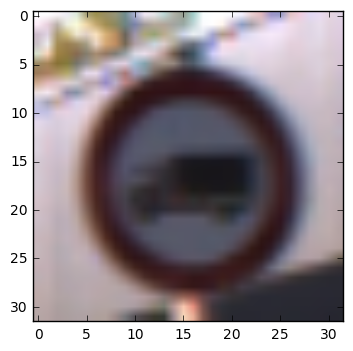

In [190]:
# Look at the first image in each class. Enter 0 to 42.

plt.imshow(X_train[np.sum(number_sign[0:16]+20)])
plt.show()

## Overview

----

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Preprocess
---

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


# Not used in final classifier, full color image is used instead.
def grayscale(img):
    #call plt.imshow(gray, cmap='gray')
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

X_train_gray = np.zeros( (len(X_train), len(X_train[0]), len(X_train[0,0]), 1 ), dtype='uint8' )
X_test_gray = np.zeros( (len(X_test), len(X_test[0]), len(X_test[0,0]) , 1 ), dtype='uint8' )




for i in range( len(X_train) ):
    X_train_gray[i,:,:,0] = grayscale(X_train[i])

for i in range( len(X_test) ):
    X_test_gray[i,:,:,0] = grayscale(X_test[i])
    

print(X_test_gray[0,0,0,:])


In [ ]:
## Normalize data, use a and b values from lab.

def normalize_image(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    grey_max = 255
    grey_min = 0
    a = 0.1
    b = 0.9
    
    norm_image_data = a + ( (image_data - grey_min)*(b - a)/(grey_max - grey_min) )
    
    return norm_image_data

X_train_norm = np.zeros( (len(X_train), len(X_train[0]), len(X_train[0,0]), 3 ), dtype='float32' )
X_test_norm = np.zeros( (len(X_test), len(X_test[0]), len(X_test[0,0]), 3 ), dtype='float32' )

for i in range( len(X_train) ):
    X_train_norm[i] = normalize_image(X_train[i])
    #X_train_norm[i] = normalize_image(X_train_gray[i])

for i in range( len(X_test) ):
    X_test_norm[i] = normalize_image(X_test[i])

print( X_train[0,0,:,2] )
print( X_train_norm[0,0,:,2] )
print( '\n')
print( X_test[0,0,:,2] )
print( X_test_norm[0,0,:,2] )

In [ ]:
## One Hot Encoding of labels

# Test

encoder = LabelBinarizer()
testlabel = np.arange(10)
testlabel = np.append(testlabel,(5,1,2))
encoder.fit(testlabel)
testlabel = encoder.transform(testlabel)

print(testlabel)
print('\n')

encoder = LabelBinarizer()
encoder.fit( y_train )
y_train = encoder.transform( y_train )

y_train = y_train.astype(dtype='float32')

print( y_train )

encoder = LabelBinarizer()
encoder.fit( y_test )
y_test = encoder.transform( y_test )

y_test = y_test.astype(dtype='float32')
print( '\n' )
print( y_test )


## Training, Validation, Testing
---



In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_norm,
    y_train,
    test_size=0,
    random_state=1336)

print( str(len(y_train)) + ' - '+ str(len(train_labels)) + ' = ' + str(len(valid_labels)))

print(train_features[0,0,0,:])

In [ ]:
# Save the data for easy access
pickle_file = 'preprocdata.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('preprocdata.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': X_test_norm,  
                    'test_labels': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

In [ ]:
print(len(X_test_norm))
print(len(train_features))
print(len(valid_features))

In [ ]:
# Test importing all required packages
import tensorflow as tf
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import cv2
import os
import pickle
from tqdm import tqdm
import math
import time
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.metrics import classification_report

print('Modules loaded successfully.')

In [ ]:
# Reload the data
pickle_file = 'preprocdata.pickle'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  train_features = pickle_data['train_dataset']
  train_labels = pickle_data['train_labels']
  valid_features = pickle_data['valid_dataset']
  valid_labels = pickle_data['valid_labels'] 
  test_features = pickle_data['test_dataset']
  test_labels = pickle_data['test_labels']
  del pickle_data  # Free up memory

    
print('Data and modules loaded.')


In [ ]:
# Check to ensure data is displaying correctly.

print(train_features[0,0,0,:])
#print(valid_features[0,0,0,:])
print(test_features[0,0,0,:])

print(train_labels[:,0])
#print(valid_labels[:,0])
print(test_labels[:,0])

## Keras NN
---

In [199]:
# Convolution kernal final size.
kernal_size = 3

# Convolutional filters.
nb_filters = 16
pool_size = (2,2)
input_shape = (32,32,3)

model = Sequential()

# First convolution layer with relu activation, max pooling, and dropout.
model.add(Convolution2D(nb_filters, kernal_size*2, kernal_size*2,
                        border_mode = 'same',
                        input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# Second convolution layer with relu, max pooling, and dropout.
model.add(Convolution2D(nb_filters*2, kernal_size, kernal_size,
                        border_mode = 'same',
                        input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size))
model.add(Dropout(0.25))

# Third convolution layer with relu, max pooling, and dropout.
model.add(Convolution2D(nb_filters*4, kernal_size, kernal_size,
                        border_mode = 'same',
                        input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size))

# First fully connected deep layer.
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Second fully connected deep layer.
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Third fully connected deep layer.
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fourth fully connected deep layer.
model.add(Dense(128))
model.add(Activation('relu'))

# Final dense layer.
model.add(Dense(43))
model.add(Activation('softmax'))

model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_41 (Convolution2D) (None, 32, 32, 16)    1744        convolution2d_input_14[0][0]     
____________________________________________________________________________________________________
activation_68 (Activation)       (None, 32, 32, 16)    0           convolution2d_41[0][0]           
____________________________________________________________________________________________________
maxpooling2d_41 (MaxPooling2D)   (None, 16, 16, 16)    0           activation_68[0][0]              
____________________________________________________________________________________________________
dropout_58 (Dropout)             (None, 16, 16, 16)    0           maxpooling2d_41[0][0]            
___________________________________________________________________________________________

In [221]:
nb_epoch = 15

prevepoch = 120
print('Before this there was', prevepoch, 'epochs.')

batch_size = 50 

starttime = time.clock()

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000005),
              metrics=['categorical_accuracy'])

history = model.fit(train_features, train_labels,
                    batch_size = batch_size, nb_epoch = nb_epoch,
                    verbose = 1, validation_split = 0.15)

elapsedtime = time.clock() - starttime

print('%.1f minutes.\n\n' %(elapsedtime/60))




Before this there was 120 epochs.
Train on 33327 samples, validate on 5882 samples
Epoch 1/15
33327/33327 [==============================] - 5s - loss: 0.0222 - categorical_accuracy: 0.9941 - val_loss: 0.0236 - val_categorical_accuracy: 0.9957
Epoch 2/15
33327/33327 [==============================] - 4s - loss: 0.0194 - categorical_accuracy: 0.9943 - val_loss: 0.0236 - val_categorical_accuracy: 0.9961
Epoch 3/15
33327/33327 [==============================] - 5s - loss: 0.0206 - categorical_accuracy: 0.9944 - val_loss: 0.0230 - val_categorical_accuracy: 0.9961
Epoch 4/15
33327/33327 [==============================] - 5s - loss: 0.0204 - categorical_accuracy: 0.9946 - val_loss: 0.0227 - val_categorical_accuracy: 0.9959
Epoch 5/15
33327/33327 [==============================] - 5s - loss: 0.0159 - categorical_accuracy: 0.9955 - val_loss: 0.0225 - val_categorical_accuracy: 0.9963
Epoch 6/15
33327/33327 [==============================] - 5s - loss: 0.0168 - categorical_accuracy: 0.9947 - val

In [294]:
# Test accuracy.
testacc = model.evaluate(test_features, test_labels)

print('\n\nTest accuracy: %.1f %%' %(testacc[1]*100))

# Max so far - 94.6%

12544/12630 [============================>.] - ETA: 0s

Test accuracy: 94.6 %


Guess Probability: 99.9999046326 %
Guess Sign Name: Vechiles over 3.5 metric tons prohibited


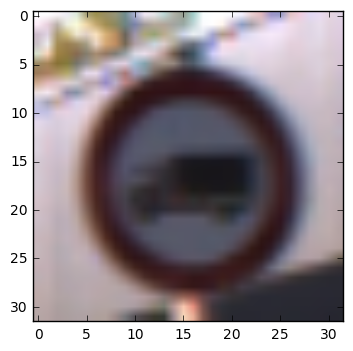

Guess Probability: 100.0 %
Guess Sign Name: End of speed limit (80km/h)


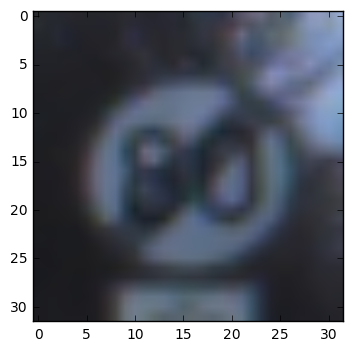

Guess Probability: 100.0 %
Guess Sign Name: No passing


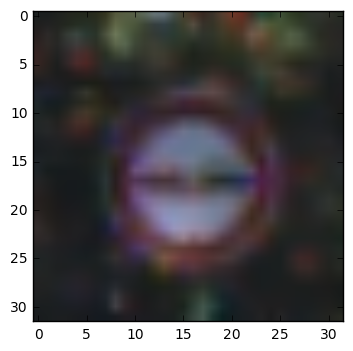

Guess Probability: 99.9419331551 %
Guess Sign Name: Speed limit (50km/h)


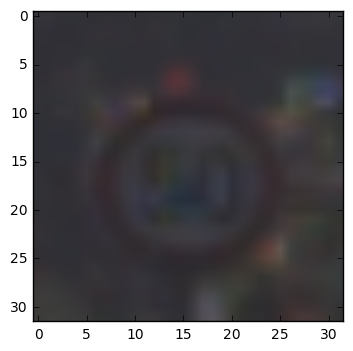

Guess Probability: 100.0 %
Guess Sign Name: Children crossing


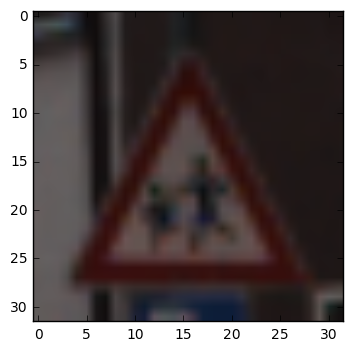

In [293]:
# Probabilities on trained images.


# plt.imshow(X_train[np.sum(number_sign[0:6]+17)])
# plt.show()

# Load select images from a few classes.
imagestest = np.zeros((5, 32,32,3)).astype('uint8')
imagestest[0] = X_train[np.sum(number_sign[0:16]+20)]
imagestest[1] = X_train[np.sum(number_sign[0:6]+17)]
imagestest[2] = X_train[np.sum(number_sign[0:9]+17)]
imagestest[3] = X_train[np.sum(number_sign[0:2]+17)]
imagestest[4] = X_train[np.sum(number_sign[0:28]+5)]

imagestest_norm = np.zeros((5,32,32,3), dtype='float32')
for i in range(len(imagestest) ):
    imagestest_norm[i] = normalize_image(imagestest[i])

ans = model.predict(imagestest_norm)

ans_maxloc = []
for i in ans:
    maxloc = np.where(i == max(i))
    ans_maxloc.append(maxloc[0][0])

for i in range(len(imagestest)):
    guessprob = ans[i,ans_maxloc[i]]
    print('Guess Probability: ' + str(guessprob*100) + ' %')

    print('Guess Sign Name: ' + signnameslist[ans_maxloc[i]])
    
    plt.imshow(imagestest[i])
    plt.show()    


Guess Probability: 99.9963760376 %
Guess Sign Name: Speed limit (100km/h)


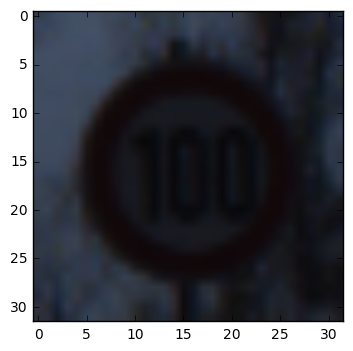

Guess Probability: 100.0 %
Guess Sign Name: Road work


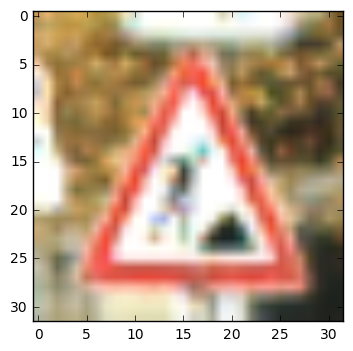

Guess Probability: 100.0 %
Guess Sign Name: No passing


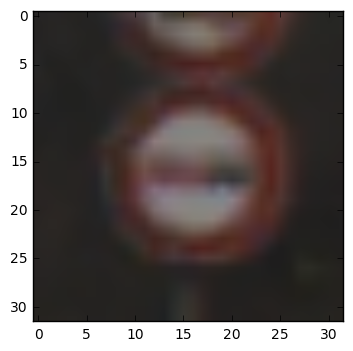

Guess Probability: 100.0 %
Guess Sign Name: No passing for vechiles over 3.5 metric tons


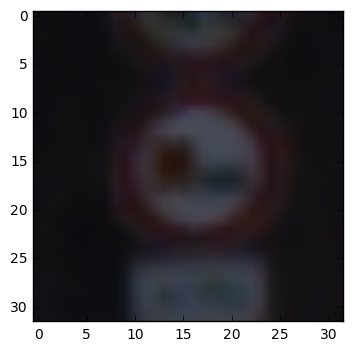

Guess Probability: 59.6971750259 %
Guess Sign Name: Slippery road


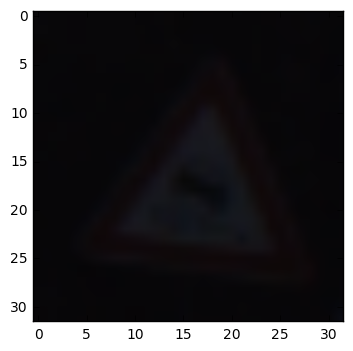

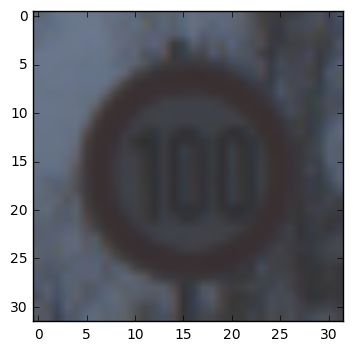

In [312]:
# Probabilities on trained images.

# for i in range(30, 60):
#     print(i)
#     plt.imshow(X_test[i])
#     plt.show()

# Load select images from a few classes.
imagestest = np.zeros((5, 32,32,3)).astype('uint8')
imagestest[0] = X_test[40]
imagestest[1] = X_test[8]
imagestest[2] = X_test[15]
imagestest[3] = X_test[27]
imagestest[4] = X_test[33]

imagestest_norm = np.zeros((5,32,32,3), dtype='float32')
for i in range(len(imagestest) ):
    imagestest_norm[i] = normalize_image(imagestest[i])

ans = model.predict(imagestest_norm)

ans_maxloc = []
for i in ans:
    maxloc = np.where(i == max(i))
    ans_maxloc.append(maxloc[0][0])

for i in range(len(imagestest)):
    guessprob = ans[i,ans_maxloc[i]]
    print('Guess Probability: ' + str(guessprob*100) + ' %')

    print('Guess Sign Name: ' + signnameslist[ans_maxloc[i]])
    
    plt.imshow(imagestest[i])
    plt.show()    

    
brighter = imagestest[0] +40
plt.imshow(brighter)
plt.show()

[90 75 68]
[ 0.38235295  0.33529413  0.31333333]
Preprocess done.


Guess Probability: 98.5687553883 %
Guess Sign Name: Speed limit (30km/h)


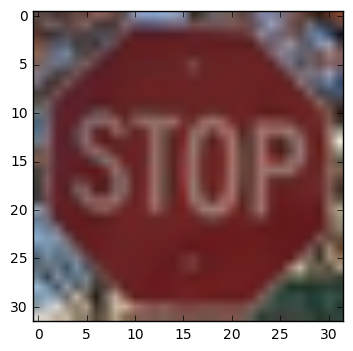

Guess Probability: 95.3784167767 %
Guess Sign Name: Vechiles over 3.5 metric tons prohibited


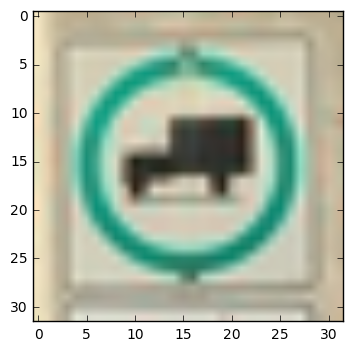

Guess Probability: 100.0 %
Guess Sign Name: Stop


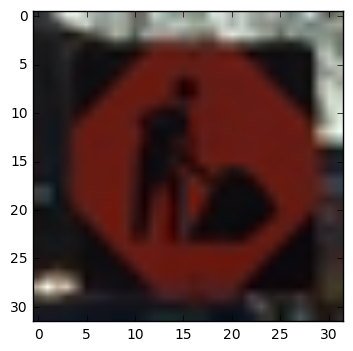

Guess Probability: 100.0 %
Guess Sign Name: Yield


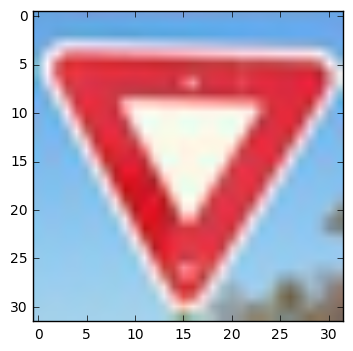

Guess Probability: 95.2401459217 %
Guess Sign Name: Speed limit (30km/h)


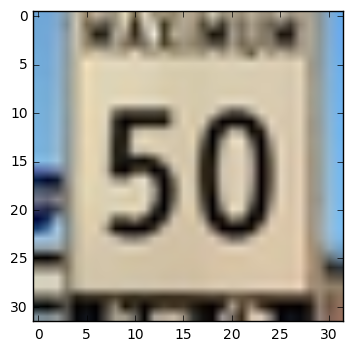

In [223]:
# Test NN on personally taken photos.

# Load images
self_img = np.zeros((5,32,32,3), dtype='uint8')

self_img[0,:,:,:] = mpimg.imread('photos/0.jpg')
self_img[1,:,:,:] = mpimg.imread('photos/2.jpg')
self_img[2,:,:,:] = mpimg.imread('photos/3.jpg')
self_img[3,:,:,:] = mpimg.imread('photos/4.jpg')
self_img[4,:,:,:] = mpimg.imread('photos/5.jpg')

    
self_img_norm = np.zeros((5,32,32,3), dtype='float32')
    
# Normalize
for i in range( len(self_img) ):
    self_img_norm[i] = normalize_image(self_img[i])
    
print(self_img[0,0,0,:])
print(self_img_norm[0,0,0,:])


print('Preprocess done.\n\n')

# Predict on test images.

self_ans = model.predict(self_img_norm)
self_maxloc = []
for i in self_ans:
    maxloc = np.where(i == max(i))
    self_maxloc.append(maxloc[0][0])
    
for i in range(0,5):
    
    guessprob = self_ans[i,self_maxloc[i]]
    print('Guess Probability: ' + str(guessprob*100) + ' %')

    print('Guess Sign Name: ' + signnameslist[self_maxloc[i]])
    
    plt.imshow(self_img[i])
    plt.show()

## Old Tensor Flow Code
---

The code below was written using tensor flow to build an image classifier. I have replaced this code with a better keras classifier. I'm keeping this old code here as I might use it in the future as a reference if if I ever use tensor flow without keras.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
# Code modified from "Deep MNIST for Experts" tutorial which had already developed the type of network
# I was looking to build which was: a few alternating convolution and pooling layers capped off by a few densely
# connected layers.

tf.reset_default_graph()

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

# Convolution Layer 1 with pooling
#x = tf.placeholder(tf.float32, [None, 32*32])
x = tf.placeholder(tf.float32, shape=[None, 32, 32,3])
y_ = tf.placeholder(tf.float32, [None, 43])

W_conv1 = weight_variable([5, 5, 3, 32]) # 32 features for each 5x5 patch
b_conv1 = bias_variable([32])

#x_image = tf.reshape(x, [-1,32,32,3])

h_conv1 = tf.nn.relu( conv2d(x, W_conv1) + b_conv1) # First layer output.
h_pool1 = max_pool_2x2(h_conv1) # apply max pooling after each conv layer.


# Convolution Layer 2 with pooling
W_conv2 = weight_variable([5, 5, 32, 64]) # 5x5 patch, 64 features.
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu( conv2d(h_pool1, W_conv2) + b_conv2 )
h_pool2 = max_pool_2x2( h_conv2 ) 

# Because the image has been pooled at 2x2 twice, the image size is now 32/(2*2) = 8. Image size is 8x8x3.
# Densely Connected Layer 3 with 1024 neurons.
W_fc1 = weight_variable([8*8*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape( h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu( tf.matmul( h_pool2_flat, W_fc1) + b_fc1)


# Dropout to increase redundancy and reduce overfitting.
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout( h_fc1, keep_prob)

# Softmax Layer 4 to output probabilities. Output must be 43. 
W_fc2 = weight_variable([1024, 43])
b_fc2 = bias_variable([43])

y_conv = tf.nn.softmax( tf.matmul( h_fc1_drop, W_fc2) + b_fc2)

print('Got here.')

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Model Training and Evaluating
batch_size = 50
epochs = 10

# Feed dicts for training, validation, and test session
train_feed_dict = {x: train_features, y_: train_labels, keep_prob: 1.0}
valid_feed_dict = {x: valid_features, y_: valid_labels, keep_prob: 1.0}
test_feed_dict = {x: test_features, y_: test_labels, keep_prob: 1.0}

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal( tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean( tf.cast(correct_prediction, tf.float32) )

In [ ]:
# Run
saver = tf.train.Saver()

sess = tf.InteractiveSession()

sess.run(tf.initialize_all_variables())

batch_count = int(math.ceil(len(train_features)/batch_size)) 
for epoch_i in range(epochs):
    # Progress bar
    batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
    # The training cycle
    for batch_i in batches_pbar:
        # Get a batch of training features and labels
        batch_start = batch_i*batch_size
        batch_features = train_features[batch_start:batch_start + batch_size]
        batch_labels = train_labels[batch_start:batch_start + batch_size]
        
        #if batch_i % 30000 == 0:
            #valid_accuracy = accuracy.eval(valid_feed_dict)
            #print("\n Validation accuracy %g" %(valid_accuracy))
            
        
        train_step.run(feed_dict = {x: batch_features, y_: batch_labels, keep_prob: 0.5})
    
    valid_accuracy = accuracy.eval(valid_feed_dict)
    print("\n Validation accuracy %g" %(valid_accuracy))
    #print("Test accuracy %g"%accuracy.eval(test_feed_dict))
    time.sleep(1)

    
save_path = saver.save(sess, "color-model.ckpt")
print("Model saved in file: %s" % save_path)
    
print('fin')

In [ ]:
print("Valid accuracy %g"%accuracy.eval(valid_feed_dict))

In [ ]:
print("Test accuracy %g"%accuracy.eval(test_feed_dict))

In [ ]:
#print("Train accuracy %g"%accuracy.eval(train_feed_dict))

In [ ]:
imnum = 380



saver = tf.train.Saver()

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "31e-model.ckpt")
    print("Model restored.")
    #print(y_conv)
    #print("Valid accuracy %g"%accuracy.eval(valid_feed_dict))
    #print("Test accuracy %g"%accuracy.eval(test_feed_dict))
    
    feed_dict = {x: X_test_norm[imnum:imnum+10], keep_prob: 1.0}
    classificationout = sess.run(y_conv, feed_dict)
    #print( classificationout[0] )
        
    predictionout=tf.argmax(y_conv,1)
    prednum = predictionout.eval(feed_dict={x: X_test_norm[imnum:imnum+10], keep_prob: 1.0})
    
    #print(prednum)
    
    print('\n')
    
    for i in range(0, 10):
        guessprob = classificationout[i,prednum[i]]
        print('Guess Probability: ' + str(guessprob) + ' %')

        print('Sign Name: ' + signnameslist[prednum[i]])
    
        #correct_prediction = tf.equal( tf.argmax(y_conv,1), tf.argmax(y_test[imnum:imnum+1],1))
        #accuracy = tf.reduce_mean( tf.cast(correct_prediction, tf.float32) )
        #print(accuracy.eval(feed_dict={x: X_test_norm[imnum:imnum+1], y_: y_test, keep_prob: 1.0}))
    
        plt.imshow(X_test[imnum+i])
        plt.show()
    
    

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


# Load images
self_img = np.zeros((5,32,32,3), dtype='uint8')

self_img[0,:,:,:] = mpimg.imread('photos/0.jpg')
self_img[1,:,:,:] = mpimg.imread('photos/2.jpg')
self_img[2,:,:,:] = mpimg.imread('photos/3.jpg')
self_img[3,:,:,:] = mpimg.imread('photos/4.jpg')
self_img[4,:,:,:] = mpimg.imread('photos/5.jpg')

self_img_gray = np.zeros((5,32,32,1), dtype='uint8')

# Grayscale
for i in range( len(self_img) ):
    self_img_gray[i,:,:,0] = grayscale(self_img[i])
    
self_img_norm = np.zeros((5,32,32,1), dtype='float32')
    
# Normalize
for i in range( len(self_img_gray) ):
    self_img_norm[i] = normalize_greyscale(self_img_gray[i])
    
print(self_img_gray[0,:,0,0])
print(self_img_norm[0,:,0,0])


print('Preprocess done.')

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

imnum = 0


saver = tf.train.Saver()

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "31e-model.ckpt")
    print("Model restored.")
    #print(y_conv)
    #print("Valid accuracy %g"%accuracy.eval(valid_feed_dict))
    #print("Test accuracy %g"%accuracy.eval(test_feed_dict))
    
    feed_dict = {x: self_img_norm[imnum:imnum+5], keep_prob: 1.0}
    classificationout = sess.run(y_conv, feed_dict)
    #print( classificationout[0] )
        
    predictionout=tf.argmax(y_conv,1)
    prednum = predictionout.eval(feed_dict={x: self_img_norm[imnum:imnum+5], keep_prob: 1.0})
    
    print(prednum)
    
    print('\n')
    
    for i in range(0, 5):
        guessprob = classificationout[i,prednum[i]]
        print('Guess Probability: ' + str(guessprob*100) + ' %')

        print('Guess Sign Name: ' + signnameslist[prednum[i]])
    
        #correct_prediction = tf.equal( tf.argmax(y_conv,1), tf.argmax(y_test[imnum:imnum+1],1))
        #accuracy = tf.reduce_mean( tf.cast(correct_prediction, tf.float32) )
        #print(accuracy.eval(feed_dict={x: X_test_norm[imnum:imnum+1], y_: y_test, keep_prob: 1.0}))
    
        plt.imshow(self_img[imnum+i])
        plt.show()
        
    guessprob = classificationout[4,2]
    print('Correct Probability: ' + str(guessprob*100) + ' %')
    guessprob = classificationout[4,:]
    print('All Probabilities:\n')
    print(guessprob)

In [ ]:
## Visualization of Softmax Probabilities
import heapq

values = heapq.nlargest(5, classificationout[4,:])
stopsignname = [signnameslist[35], signnameslist[3], signnameslist[1], signnameslist[25], signnameslist[0]]
plt.bar(np.arange(0,5),values, alpha=.99)
plt.xticks(np.arange(0.5,5.5), stopsignname, rotation=30, horizontalalignment='right',size=10)
plt.ylabel('Guess Probability %')
plt.title('50 km/h Softmax Probability')

plt.show()

values = heapq.nlargest(5, classificationout[0,:])
stopsignname = [signnameslist[14], signnameslist[36], signnameslist[17], signnameslist[22], signnameslist[38]]
                
plt.bar(np.arange(0,5),values, alpha=.66)
plt.xticks(np.arange(0.5,5.5), stopsignname, rotation=30, horizontalalignment='right',size=10)
plt.ylabel('Guess Probability %')
plt.title('Stop Sign Softmax Probability')

plt.show()




values = heapq.nlargest(5, classificationout[2,:])
stopsignname = [signnameslist[25], signnameslist[35], signnameslist[13], signnameslist[33], signnameslist[10]]
plt.bar(np.arange(0,5),values, alpha=0.33)
plt.xticks(np.arange(0.5,5.5), stopsignname, rotation=30, horizontalalignment='right',size=10)
plt.ylabel('Guess Probability %')
plt.title('Road Work Softmax Probability')

plt.show()



